# Populasjonsmodeller

Noen eksempler på faktorer vi må ta hensyn til når vi skal studere en populasjon:

* Hvilket samspill har arten med andre arter?
* Hvilken tilgang har populasjonen på mat og andre nødvendige ressurser?
* Hvor stor plass har populasjonen til å utvide seg?
* Hvilke abiotiske (ikke-levende) faktorer påvirker populasjonen? Dette kan f.eks. være årstider, lys- og vindforhold, luftfuktighet, næringssalter osv.
* Hvilke sykdommer og parasitter finnes i økosystemet?


<img src='http://res.cloudinary.com/yaffa-publishing/image/fetch/q_auto,c_fit,w_630,f_auto/http%3A%2F%2Fyaffa-cdn.s3.amazonaws.com%2Fyaffadsp%2Fimages%2FdmImage%2FSourceImage%2Frabbit-eaten-by-fox.jpg'>


### En enkel modell for kaniner kan være:

$K^{\prime}(t) = aK(t)$

Endringen i populasjonen er avhengig av hvor mange kaniner det er til en hver tid.

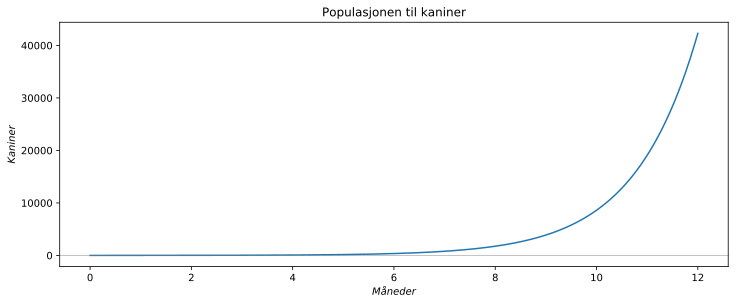

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

#Initialbetingelsene
K_0 = 3       #Populasjone ved starttidspunktet
a   = 0.8     #Fødselrate

#Tidssteg
T = 12        #Antall måneder
dt = 0.01     #Steglengde (tidssteg)
N = round(T/dt)#Antall steg


t = np.linspace(0, T, N)
K = np.zeros(N)

K[0] = K_0

#Newtons metode
for i in range(N - 1):
    K[i + 1] = K[i] + a*K[i]*dt
    
plt.rcParams['figure.figsize'] = (12, 4.5)
plt.xlabel('$Måneder$') # Merker x-aksen
plt.ylabel('$Kaniner$') # Merker y-aksen
plt.title('Populasjonen til kaniner') #Tittel
plt.plot(t, K)
plt.axhline(0, color='gray', lw=0.5)
plt.show()

### Utvidet modell 

Hvis vi vil, kan vi lett legge inn en annen modell, som baserer seg på at vi har en bæreevne på grunn av begrenset tilgang på f.eks. plass eller ressurser. Bæreevnen b er antallet individer som økosystemet stabiliserer seg rundt på grunn av dette. Modellen ser da slik ut:

$$K^{\prime}(t) = aK(t)\left(1-\frac{K(t)}{b}\right)$$

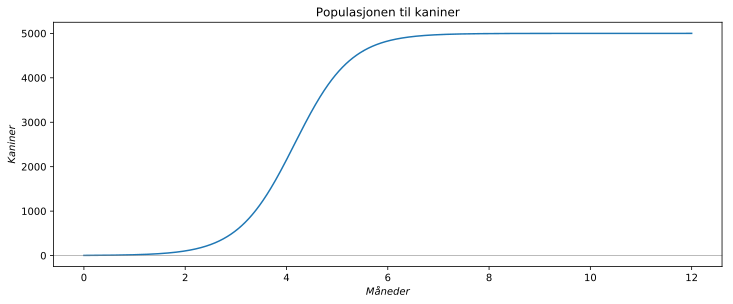

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

#Initialbetingelsene
K_0 = 3       #Populasjone ved starttidspunktet
a   = 1.8     #Fødselrate
b   = 5000    #Populasjontak/begrensning

#Tidssteg
T = 12        #Antall måneder
dt = 0.01      #Steglengde
N = round(T/dt)#Antall steg


t = np.linspace(0, T, N)
K = np.zeros(N)

K[0] = K_0

#Eulers metode
for i in range(N - 1):
    K[i + 1] = K[i] + a*K[i]*(1 - K[i]/b)*dt
    
plt.rcParams['figure.figsize'] = (12, 4.5)
plt.xlabel('$Måneder$') # Merker x-aksen
plt.ylabel('$Kaniner$') # Merker y-aksen
plt.title('Populasjonen til kaniner') #Tittel
plt.plot(t, K)
plt.axhline(0, color='gray', lw=0.5)
plt.show()

### Utvidet modell 2

**Hva om vi legger til en revepopulasjon i modellen?**

$$K’(t) = aK(t)\left(1-\frac{K(t)}{b}\right) - cK(t)R(t)$$


$$R’(t) = dK(t)R(t) - eR(t)$$

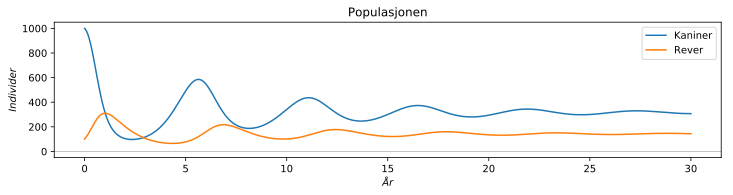

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

#Initialbetingelser
K_0 = 1000    # Antall kaninger ved tid 0
R_0 = 100     # Anatal reer ved tid 0
a   = 1.7     # Formeringsrate kanin
b   = 2000    # Bæreevne kanin
c   = 0.01    # Drapsrate
d   = 0.003   # Formeringsrate rev
e   = 0.95    # Dødsrate rev

#Tidssteg
T = 30                     # tidsperiode i år
dt = 0.01                    # steglengde
N = round(T/dt)             # antall steg

t = np.linspace(0, T, N) # tidsarray
K = np.zeros(N)
R = np.zeros(N)

K[0] = K_0
R[0] = R_0

for i in range(N-1):
    K[i + 1] = K[i] + (a*K[i]*(1-K[i]/b) - c*K[i]*R[i])*dt
    R[i + 1] = R[i] + (d*K[i]*R[i] - e*R[i])*dt

plt.rcParams['figure.figsize'] = (12, 2.5)
plt.xlabel('$År$') # Merker x-aksen
plt.ylabel('$Individer$') # Merker y-aksen
plt.title('Populasjonen') #Tittel
plt.plot(t, K, label='Kaniner')
plt.plot(t, R, label='Rever')
plt.legend();
plt.axhline(0, color='gray', lw=0.5)
plt.show()